In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [2]:
data_raw = pd.read_csv("gas_turbines.csv")
data_raw

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [3]:
data_raw.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


# Boxplot for all Variables

AT


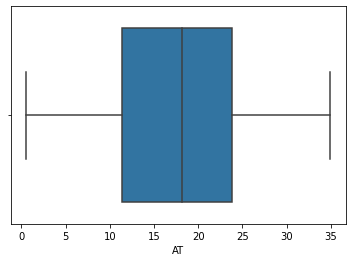

AP


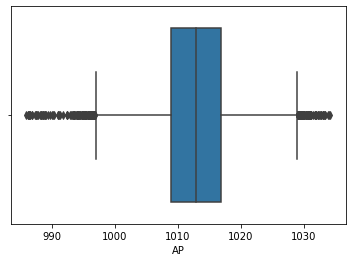

AH


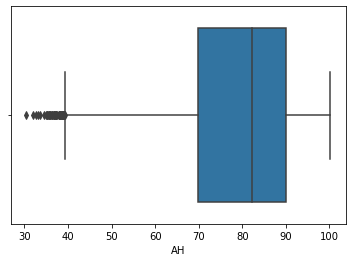

AFDP


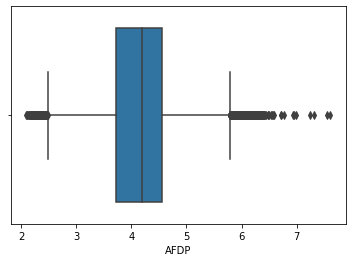

GTEP


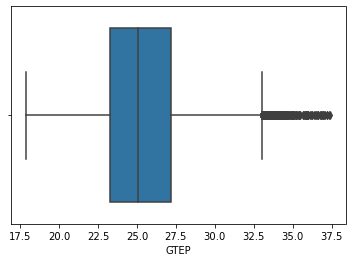

TIT


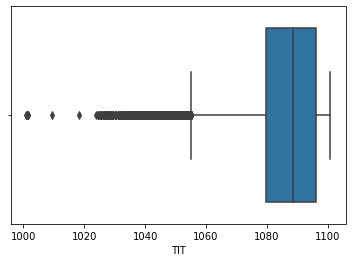

TAT


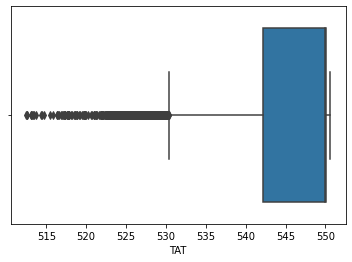

TEY


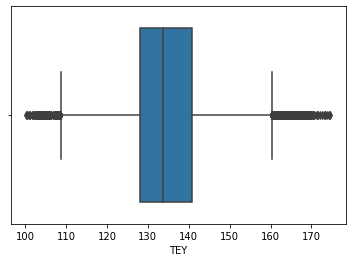

CDP


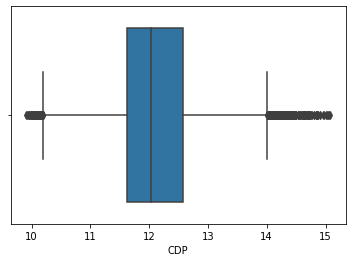

CO


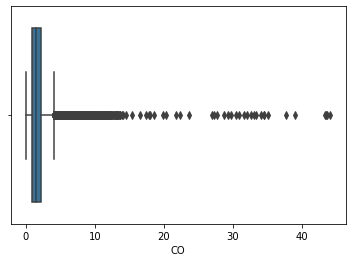

NOX


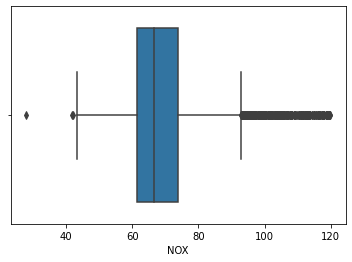

In [4]:
for i in data_raw.columns:
    print(i)
    sns.boxplot(data_raw[i])
    plt.show()

# Scatter Plot

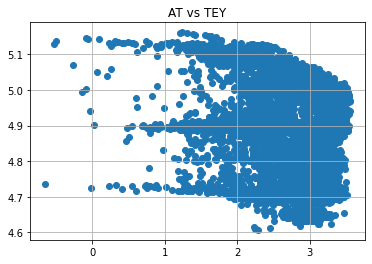

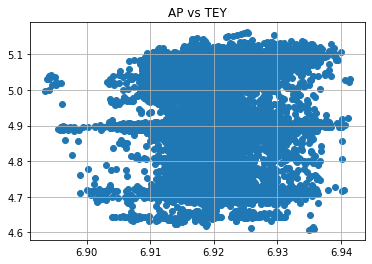

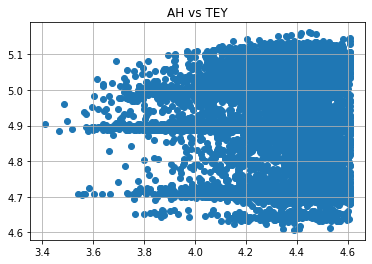

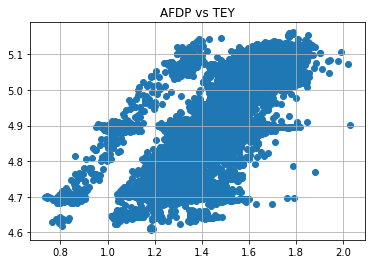

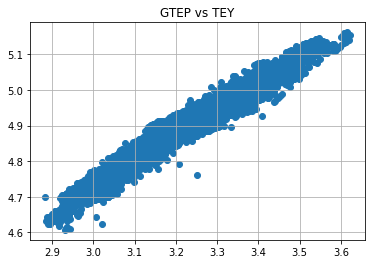

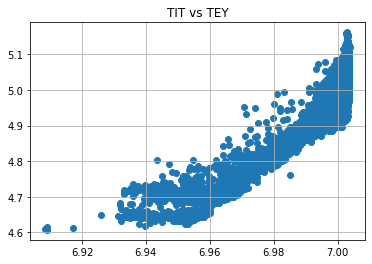

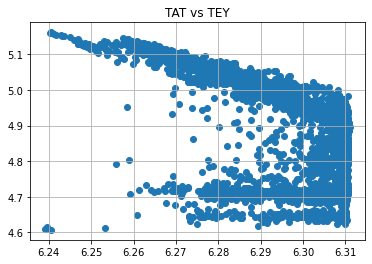

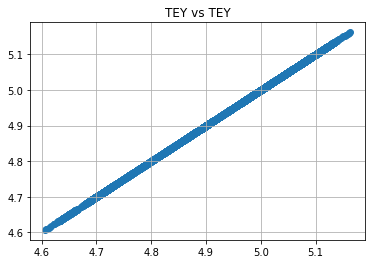

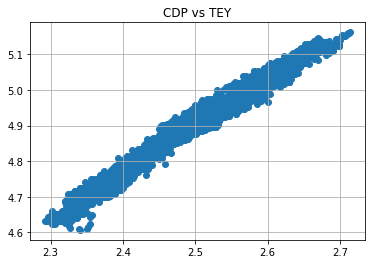

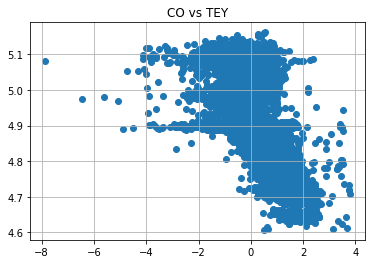

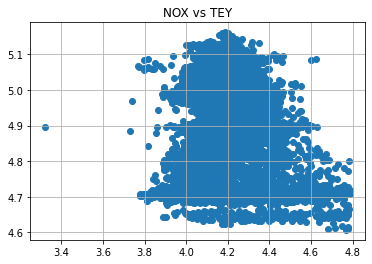

In [5]:
for i in data_raw.columns:
    plt.scatter(np.log(data_raw[i]), np.log(data_raw['TEY']))
    plt.title(i+ ' vs TEY')
    plt.grid()
    plt.show()

In [6]:
data = data_raw[data_raw['CO']<data_raw['CO'].quantile(.9)]

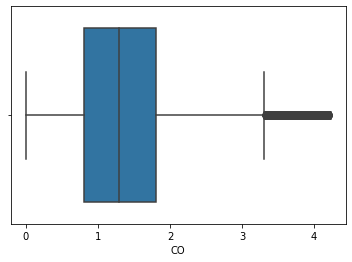

In [7]:
sns.boxplot(data['CO'])

# Scaling the data

In [8]:
df1=data_raw.drop(columns = ['TEY'], axis = 1)

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm.shape

(15039, 10)

# Using PCA to reduce number of columns

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 2.96312931e+00,  1.55278647e+00, -1.06151442e+00, ...,
         2.10231105e-02,  5.75152593e-03,  4.99791124e-03],
       [ 2.96650064e+00,  1.60538798e+00, -1.03505483e+00, ...,
         2.12055328e-02,  2.37244599e-02,  1.69962670e-03],
       [ 2.93921460e+00,  1.57503505e+00, -9.52600036e-01, ...,
         3.49260195e-02,  3.20799124e-02,  4.66997527e-03],
       ...,
       [ 3.82641073e+00,  2.87583876e+00, -4.33166707e-02, ...,
        -5.07757355e-01, -3.31627881e-02,  9.04937662e-03],
       [ 3.64983118e+00,  2.68240631e+00, -2.87732887e-01, ...,
        -5.85894357e-01, -6.26241771e-02, -1.91206134e-02],
       [ 3.47624530e+00,  2.31784601e+00, -5.07227467e-01, ...,
        -4.22289728e-01, -7.52319287e-02, -5.06006942e-02]])

In [11]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([4.35058425e-01, 2.25399195e-01, 9.84778419e-02, 8.90606453e-02,
       7.31692255e-02, 3.80313993e-02, 2.84670659e-02, 1.19359068e-02,
       2.82529035e-04, 1.17766369e-04])

In [12]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 43.51,  66.05,  75.9 ,  84.81,  92.13,  95.93,  98.78,  99.97,
       100.  , 100.01])

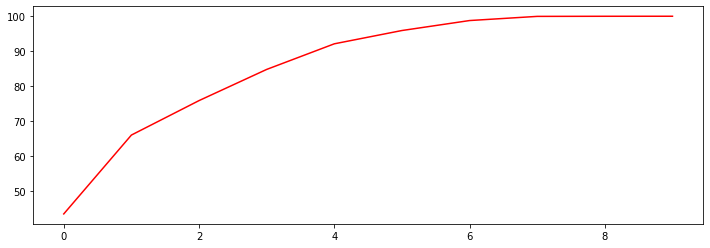

In [13]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [14]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:8],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8']),
                                                             
                     data_raw[['TEY']]], axis = 1)
finalDf.TEY

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

# Splitting dataset

In [15]:
array = finalDf.values
X = array[:,0:9]
y = array[:,-1]

print(X.shape,y.shape)

(15039, 9) (15039,)


In [16]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# Creating, Compiling and Fitting Model

In [17]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=9, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='relu'))


In [18]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['MeanSquaredError', 'MeanAbsoluteError'])

In [19]:
# Fit the model
history= model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10)

Epoch 1/150
1008/1008 [==============================] - 4s 2ms/step - loss: 18578.6554 - mean_squared_error: 18578.6554 - mean_absolute_error: 135.3642 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 2/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18627.1414 - mean_squared_error: 18627.1414 - mean_absolute_error: 135.5356 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 3/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18572.1193 - mean_squared_error: 18572.1193 - mean_absolute_error: 135.3556 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 4/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18532.0499 - mean_squared_error: 18532.0499 - mean_absolute_error: 135.1842 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoc

Epoch 34/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18540.0549 - mean_squared_error: 18540.0549 - mean_absolute_error: 135.2426 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 35/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18607.2215 - mean_squared_error: 18607.2226 - mean_absolute_error: 135.4680 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 36/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18502.7799 - mean_squared_error: 18502.7800 - mean_absolute_error: 135.0981 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 37/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18512.5586 - mean_squared_error: 18512.5586 - mean_absolute_error: 135.1063 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507


Epoch 67/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18527.9560 - mean_squared_error: 18527.9562 - mean_absolute_error: 135.1700 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 68/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18553.7218 - mean_squared_error: 18553.7218 - mean_absolute_error: 135.2904 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 69/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18537.5312 - mean_squared_error: 18537.5316 - mean_absolute_error: 135.2087 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 70/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18606.6629 - mean_squared_error: 18606.6629 - mean_absolute_error: 135.4547 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507


Epoch 100/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18526.1299 - mean_squared_error: 18526.1299 - mean_absolute_error: 135.1810 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 101/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18515.8232 - mean_squared_error: 18515.8232 - mean_absolute_error: 135.1325 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 102/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18523.0165 - mean_squared_error: 18523.0165 - mean_absolute_error: 135.1583 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 103/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18534.3226 - mean_squared_error: 18534.3233 - mean_absolute_error: 135.1906 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9

Epoch 133/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18652.2110 - mean_squared_error: 18652.2103 - mean_absolute_error: 135.6322 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 134/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18650.1962 - mean_squared_error: 18650.1961 - mean_absolute_error: 135.6077 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 135/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18607.1998 - mean_squared_error: 18607.1998 - mean_absolute_error: 135.4666 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9507
Epoch 136/150
1008/1008 [==============================] - 1s 1ms/step - loss: 18575.2390 - mean_squared_error: 18575.2388 - mean_absolute_error: 135.3259 - val_loss: 17642.9648 - val_mean_squared_error: 17642.9648 - val_mean_absolute_error: 131.9

In [20]:
# evaluate the model
scores = model.evaluate(X, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

470/470 [==============================] - 0s 765us/step - loss: 18257.1094 - mean_squared_error: 18257.1094 - mean_absolute_error: 134.1884
mean_squared_error: 1825710.94%


In [21]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])

# Hyperparameter Tuning

#### Tuning of Hyperparameters :- Batch Size and Epochs

In [23]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam 

In [24]:
# create a sequential model
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=9, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam, metrics=['MeanSquaredError', 'MeanAbsoluteError'])
  return model

In [25]:
# create regression model
model= KerasRegressor(build_fn=create_model, verbose=0)
# create grid search model
batch_size=[50,100, 200, 400, 800, 1000]
epochs=[10,50,100]
# Make a dictionary of grid search parameters
param_grid= dict(batch_size= batch_size, epochs=epochs)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=50, epochs=10...................................
[CV 1/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.111 total time=   2.7s
[CV 2/5; 1/18] START batch_size=50, epochs=10...................................
[CV 2/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.008 total time=   2.5s
[CV 3/5; 1/18] START batch_size=50, epochs=10...................................
[CV 3/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.136 total time=   2.8s
[CV 4/5; 1/18] START batch_size=50, epochs=10...................................
[CV 4/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.001 total time=   2.3s
[CV 5/5; 1/18] START batch_size=50, epochs=10...................................
[CV 5/5; 1/18] END ...batch_size=50, epochs=10;, score=-0.001 total time=   2.8s
[CV 1/5; 2/18] START batch_size=50, epochs=50...................................
[CV 1/5; 2/18] END ...batch_size=50, epochs=50;,

[CV 1/5; 11/18] END .batch_size=400, epochs=50;, score=-1.108 total time=   2.4s
[CV 2/5; 11/18] START batch_size=400, epochs=50.................................
[CV 2/5; 11/18] END .batch_size=400, epochs=50;, score=-0.176 total time=   2.2s
[CV 3/5; 11/18] START batch_size=400, epochs=50.................................
[CV 3/5; 11/18] END .batch_size=400, epochs=50;, score=-0.612 total time=   2.2s
[CV 4/5; 11/18] START batch_size=400, epochs=50.................................
[CV 4/5; 11/18] END batch_size=400, epochs=50;, score=-18093.186 total time=   2.3s
[CV 5/5; 11/18] START batch_size=400, epochs=50.................................
[CV 5/5; 11/18] END .batch_size=400, epochs=50;, score=-0.024 total time=   2.2s
[CV 1/5; 12/18] START batch_size=400, epochs=100................................
[CV 1/5; 12/18] END batch_size=400, epochs=100;, score=-0.021 total time=   3.6s
[CV 2/5; 12/18] START batch_size=400, epochs=100................................
[CV 2/5; 12/18] END batch

In [26]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.00011606052430579439, using {'batch_size': 100, 'epochs': 50}
-0.051243234251160175,0.05952770605226121 with: {'batch_size': 50, 'epochs': 10}
-0.0005449245887575671,0.00038233274263538703 with: {'batch_size': 50, 'epochs': 50}
-2575.1659321548477,5150.330119860137 with: {'batch_size': 50, 'epochs': 100}
-0.8444961991161108,1.0141781970164687 with: {'batch_size': 100, 'epochs': 10}
-0.00011606052430579439,4.25419180541977e-05 with: {'batch_size': 100, 'epochs': 50}
-0.00050421332125552,0.00018878470568083004 with: {'batch_size': 100, 'epochs': 100}
-2.5966571092605593,2.2825364423956684 with: {'batch_size': 200, 'epochs': 10}
-0.005818864626053255,0.01088455344315544 with: {'batch_size': 200, 'epochs': 50}
-0.0001574252193677239,5.839291243376657e-05 with: {'batch_size': 200, 'epochs': 100}
-5.214404773712158,2.806574722613252 with: {'batch_size': 400, 'epochs': 10}
-3619.0211071211843,7237.082229717865 with: {'batch_size': 400, 'epochs': 50}
-0.005060024774866179,0.008275228

#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [27]:
from keras.layers import Dropout

# defining model
def create_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(10, input_dim=9, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam(learning_rate= learning_rate)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model


# Define regression model
model= KerasRegressor(build_fn=create_model_lr_drate, verbose=0, batch_size=100, epochs=50)
# Define grid search model
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.5]
dropout_rate=[0, 0.1, 0.2]
# Make a dictionary of grid search parameters
param_grid= dict(learning_rate= learning_rate, dropout_rate=dropout_rate)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X,y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 1/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-0.000 total time=   6.1s
[CV 2/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 2/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-0.000 total time=   5.9s
[CV 3/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 3/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-0.000 total time=   6.0s
[CV 4/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 4/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-0.000 total time=   5.9s
[CV 5/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 5/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-0.000 total time=   6.0s
[CV 1/5; 2/15] START dropout_rate=0, learning_rate=0.01.........................
[CV 1/5;

[CV 4/5; 10/15] END dropout_rate=0.1, learning_rate=0.5;, score=-238.485 total time=   6.4s
[CV 5/5; 10/15] START dropout_rate=0.1, learning_rate=0.5.......................
[CV 5/5; 10/15] END dropout_rate=0.1, learning_rate=0.5;, score=-259.377 total time=   6.7s
[CV 1/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 1/5; 11/15] END dropout_rate=0.2, learning_rate=0.001;, score=-87.508 total time=   6.6s
[CV 2/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 2/5; 11/15] END dropout_rate=0.2, learning_rate=0.001;, score=-503.346 total time=   6.4s
[CV 3/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 3/5; 11/15] END dropout_rate=0.2, learning_rate=0.001;, score=-123.884 total time=   6.5s
[CV 4/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 4/5; 11/15] END dropout_rate=0.2, learning_rate=0.001;, score=-152.881 total time=   6.3s
[CV 5/5; 11/15] START dropout_rate=0

In [28]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.00017740251205395908, using {'dropout_rate': 0, 'learning_rate': 0.001}
-0.00017740251205395908,3.705180773126499e-05 with: {'dropout_rate': 0, 'learning_rate': 0.001}
-0.20765997883863746,0.20145192291566316 with: {'dropout_rate': 0, 'learning_rate': 0.01}
-5.1671849370002745,7.471836207028485 with: {'dropout_rate': 0, 'learning_rate': 0.1}
-147.75149774551392,133.2786471672213 with: {'dropout_rate': 0, 'learning_rate': 0.2}
-263.02753295898435,73.23925409116002 with: {'dropout_rate': 0, 'learning_rate': 0.5}
-146.01419486999512,129.50790966426612 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-27.227528429031373,25.86728312619965 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-26.27783260345459,20.874501026680566 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-157.82875595092773,139.6389149359132 with: {'dropout_rate': 0.1, 'learning_rate': 0.2}
-258.4779571533203,72.4239431385955 with: {'dropout_rate': 0.1, 'learning_rate': 0.5}
-188.97216033935547,159.46684685

#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [29]:
def create_model_af_ker_ini(activation_function,init):
  model= Sequential()
  model.add(Dense(10, input_dim=9, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= init, activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_af_ker_ini, verbose=0, batch_size=100, epochs=50)
# Define grid search model
activation_function=['linear', 'relu']
init=['uniform', 'normal', 'zero']
# Make a dictionary of grid search parameters
param_grid= dict(activation_function= activation_function, init=init)
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=linear, init=uniform....................
[CV 1/5; 1/6] END activation_function=linear, init=uniform;, score=-0.000 total time=   5.7s
[CV 2/5; 1/6] START activation_function=linear, init=uniform....................
[CV 2/5; 1/6] END activation_function=linear, init=uniform;, score=-0.000 total time=   6.0s
[CV 3/5; 1/6] START activation_function=linear, init=uniform....................
[CV 3/5; 1/6] END activation_function=linear, init=uniform;, score=-0.000 total time=   5.8s
[CV 4/5; 1/6] START activation_function=linear, init=uniform....................
[CV 4/5; 1/6] END activation_function=linear, init=uniform;, score=-0.000 total time=   6.1s
[CV 5/5; 1/6] START activation_function=linear, init=uniform....................
[CV 5/5; 1/6] END activation_function=linear, init=uniform;, score=-0.000 total time=   6.2s
[CV 1/5; 2/6] START activation_function=linear, init=normal...........

In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -9.542106272419915e-05, using {'activation_function': 'linear', 'init': 'normal'}
-0.00010807473445311189,2.0204007479777867e-05 with: {'activation_function': 'linear', 'init': 'uniform'}
-9.542106272419915e-05,1.0885570263160278e-05 with: {'activation_function': 'linear', 'init': 'normal'}
-16678.569140625,858.1664713848803 with: {'activation_function': 'linear', 'init': 'zero'}
-0.00018616597080836072,7.713898347486927e-05 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.00015611782728228719,4.1895186775675524e-05 with: {'activation_function': 'relu', 'init': 'normal'}
-16678.594921875,858.1576310257954 with: {'activation_function': 'relu', 'init': 'zero'}


#### Tuning of Hyperparameter :- Number of Neurons in activation layer

In [31]:
def create_model_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=9, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron2, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron3, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model


# Define regression model
model= KerasRegressor(build_fn=create_model_neuron, verbose=0, batch_size=100, epochs=50)
# Define grid search model
neuron1=[4,8,16]
neuron2=[4,8,16]
neuron3=[4,8,16]
# Make a dictionary of grid search parameters
param_grid= dict(neuron1= neuron1, neuron2=neuron2,neuron3=neuron3 )
#build and fit the gridsearchCV
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(X,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 1/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.000 total time=   4.5s
[CV 2/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 2/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.000 total time=   4.6s
[CV 3/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 3/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.000 total time=   4.9s
[CV 4/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 4/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.000 total time=   5.0s
[CV 5/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 5/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-0.000 total time=   4.6s
[CV 1/5; 2/27] START neuron1=4, neuron2=4, neuron3=8............................
[CV 1/5; 2/27] END neuron1=

[CV 5/5; 10/27] END neuron1=8, neuron2=4, neuron3=4;, score=-0.000 total time=   5.6s
[CV 1/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 1/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-0.000 total time=   5.6s
[CV 2/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 2/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-0.000 total time=   5.6s
[CV 3/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 3/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-0.000 total time=   5.6s
[CV 4/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 4/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-0.000 total time=   5.6s
[CV 5/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 5/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-0.000 total time=   5.6s
[CV 1/5; 12/27] START neuron1=8, neuron2=4, neuron3=16.........................

[CV 4/5; 20/27] END neuron1=16, neuron2=4, neuron3=8;, score=-0.000 total time=   5.8s
[CV 5/5; 20/27] START neuron1=16, neuron2=4, neuron3=8..........................
[CV 5/5; 20/27] END neuron1=16, neuron2=4, neuron3=8;, score=-0.000 total time=   5.8s
[CV 1/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 1/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-0.000 total time=   6.2s
[CV 2/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 2/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-0.000 total time=   6.3s
[CV 3/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 3/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-0.000 total time=   6.2s
[CV 4/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 4/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-0.000 total time=   6.2s
[CV 5/5; 21/27] START neuron1=16, neuron2=4, neuron3=16..............

In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -5.810487346025184e-05, using {'neuron1': 16, 'neuron2': 16, 'neuron3': 4}
-0.0001564732287079096,1.8326619617665912e-05 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-0.00019386981439311056,2.532954250980615e-05 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 8}
-0.00023735551221761852,3.0012837903504498e-05 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 16}
-0.00014959646650822834,1.858454818526215e-05 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 4}
-0.00019229534373153002,3.0445345614169354e-05 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 8}
-0.00019353707029949873,2.736786062162255e-05 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 16}
-0.00015353337512351571,2.701793309933484e-05 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 4}
-0.00019977772899437696,2.4203032306321848e-05 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 8}
-0.0002040050399955362,2.5365482647548103e-05 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 16}
-9.717972570797429e-05,1.3627153383396604e-05 with: {'

#### Tuning of Hyperparameter: Cross_Validation_Score

In [33]:
def create_model_opt():
  model= Sequential()
  model.add(Dense(16, input_dim=9, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(16, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(4, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_opt, verbose=10, batch_size=100, epochs=50)

# Fitting model
estimator= model.fit(X,y)
kfold= KFold(n_splits=10, random_state=1, shuffle=True)
results= cross_val_score(model, X,y, cv= kfold)

print('mse:', results.mean())

Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/5

# Training model with optimum values of Hyperparameters

In [34]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model= Sequential()
    model.add(Dense(16, input_dim=9, kernel_initializer= 'normal', activation='linear'))
    model.add(Dropout(0))
    model.add(Dense(16, kernel_initializer= 'normal', activation='linear'))
    model.add(Dropout(0))
    model.add(Dense(4, kernel_initializer= 'normal', activation='linear'))
    model.add(Dropout(0))
    model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
    
    adam = Adam(lr = 0.001) 
    
    model.compile(loss = 'mean_squared_error', optimizer = adam, metrics=['MeanSquaredError', 'MeanAbsoluteError'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 10,batch_size = 100,epochs = 50)

# Fitting model

estimator= model.fit(X,y)
kfold= KFold(n_splits=10, random_state=1, shuffle=True)
results= cross_val_score(model, X,y, cv= kfold)


# Predicting using trained model

y_predict = model.predict(X)

# Printing the metrics
print('MSE:', results.mean())


Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/50
Epoch 36/50
Epoch 37/50
Epoch 38/50
Epoch 39/50
Epoch 40/50
Epoch 41/50
Epoch 42/50
Epoch 43/50
Epoch 44/50
Epoch 45/50
Epoch 46/50
Epoch 47/50
Epoch 48/50
Epoch 49/50
Epoch 50/50
Epoch 1/50
Epoch 2/50
Epoch 3/50
Epoch 4/50
Epoch 5/50
Epoch 6/50
Epoch 7/50
Epoch 8/50
Epoch 9/50
Epoch 10/50
Epoch 11/50
Epoch 12/50
Epoch 13/50
Epoch 14/50
Epoch 15/50
Epoch 16/50
Epoch 17/50
Epoch 18/50
Epoch 19/50
Epoch 20/50
Epoch 21/50
Epoch 22/50
Epoch 23/50
Epoch 24/50
Epoch 25/50
Epoch 26/50
Epoch 27/50
Epoch 28/50
Epoch 29/50
Epoch 30/50
Epoch 31/50
Epoch 32/50
Epoch 33/50
Epoch 34/50
Epoch 35/5

In [46]:
# Prediction of Dependant Variable(y) with all Independent Features(X)

y_predict = model.predict(X)
y_predict[0:50]

array([114.71375, 114.73426, 114.72514, 114.73503, 114.73387, 114.73226,
       114.72295, 114.72255, 114.73151, 131.70251, 133.6644 , 134.23102,
       134.68286, 134.67154, 134.6703 , 134.68002, 134.68044, 134.68161,
       134.67065, 134.67052, 134.6676 , 133.80179, 134.12418, 112.81496,
       122.34527, 133.95688, 150.32507, 134.23755, 150.0148 , 150.48505,
       147.70723, 150.57903, 134.09756, 139.68297, 142.0251 , 145.74045,
       149.60532, 134.61   , 134.35979, 133.744  , 134.6958 , 134.32155,
       135.90353, 135.06157, 116.7209 , 135.0625 , 134.62971, 156.93114,
       158.6738 , 151.79942], dtype=float32)

In [49]:
# Printing the metrics
print('Mean Squared Error:', results.mean())

Mean Squared Error: -6.222050578799098e-05


# Insights

+ **Mean Squared Error for model is -6.22**
+ Data was scaled to make it uniform.
+ Used PCA to reduce number of columns.
+ Used Mean Squared Error to calculate **Loss**.
+ Used Activation function: **Linear**, can use relu as well.
+ Used Linear Regressor model for our **Linear "y" variable**.
+ Used **Mean Squared Error** score for Evaluation of the model.
+ Hypertuned the dataset with Batch Size & Epochs, Learning & Dropout Rate, Activation Function & Kernel Initializer, and Number of Neurons in activation layer, Cross_Validation Score.